In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
from subprocess import check_output

In [2]:
df_columns = pd.read_csv('_Columns.csv',sep=',')
df_raw = pd.read_csv('LeagueofLegends.csv',sep=',')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

In [3]:
df_raw.head(1)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...


In [4]:
df = df_raw.copy(deep=True)
df['win_team'] = np.where(df['bResult']==1, 'blue', 'red')
df[['win_team', 'bResult', 'rResult']].head()

,win_team,bResult,rResult
0,blue,1,0
1,red,0,1
2,blue,1,0
3,red,0,1
4,blue,1,0


C:\Users\jubs1\AppData\Local\Temp/ipykernel_13868/291847325.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
C:\Users\jubs1\AppData\Local\Temp/ipykernel_13868/291847325.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
C:\Users\jubs1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jubs1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

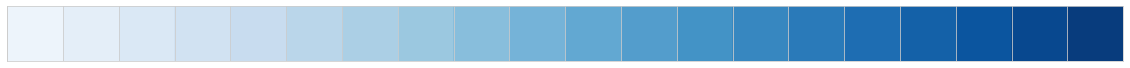

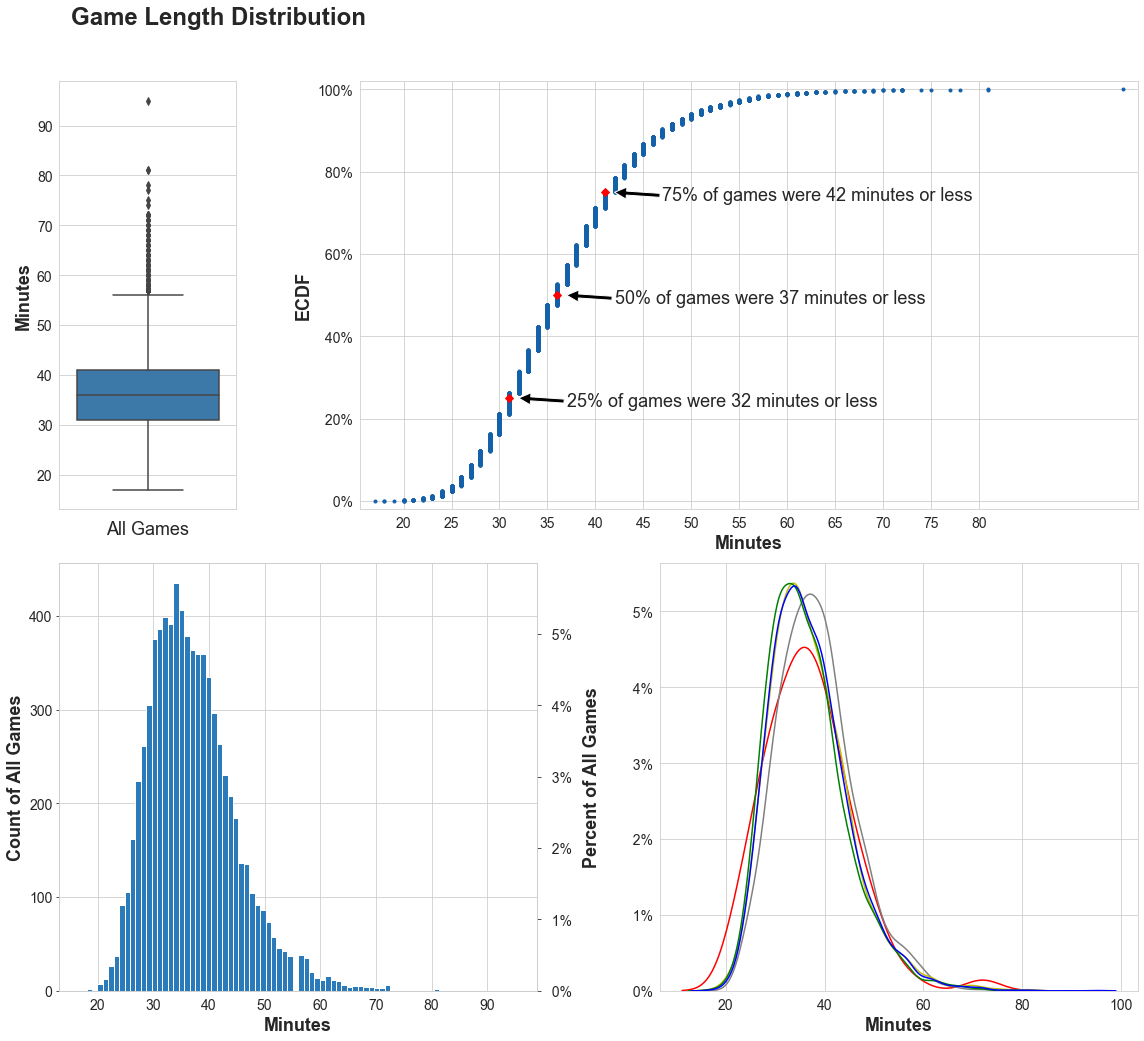

In [5]:
# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

# Create Figure
fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Game Length Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

# Create Subplots

# 1 Box and Whisker
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[14])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')

# 2 ECDF Plot
p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))

# 3 Histogram Count
p3 = plt.subplot2grid((2,4), (1,0), colspan=2)
plt.hist(x='gamelength', bins=80, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df['gamelength']) / len(df['gamelength'])
p3 = plt.twinx()
plt.hist(x='gamelength', bins=80, weights= weights, data=df, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)

# 4 Distribution Plot across Years
p4 = plt.subplot2grid((2,4), (1,2), colspan=2)
sns.distplot((df['gamelength'][df['Year']==2014]), hist=False, color='r', label='2014')
sns.distplot((df['gamelength'][df['Year']==2015]), hist=False, color='grey', label='2015')
sns.distplot((df['gamelength'][df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((df['gamelength'][df['Year']==2017]), hist=False, color='g', label='2017')
sns.distplot((df['gamelength']), hist=False, color='b', label='All Years')

# Formatting
yvals = p4.get_yticks()
p4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Percent of All Games\n', fontsize=18, fontweight='bold')
plt.xlabel('Minutes', fontsize = 18, fontweight = 'bold')

# Show everything
plt.tight_layout()
plt.show()

In [6]:
pd.unique(df['League'])

array(['NALCS', 'EULCS', 'LCK', 'LMS', 'CBLoL', 'TCL', 'OPL', 'CLS',
       'LLN', 'LJL', 'LCL', 'WC', 'MSI', 'IEM', 'RR'], dtype=object)

In [7]:
dct_leagues = {'North_America':'NA', 'Europe':'EUR', 'LCK':'LCK', 'LMS':'LMS', 'Season_World_Championship':'SWC', 
               'Mid-Season_Invitational':'MSI', 'CBLOL':'CBLOL'}

# Map League Abbreviations
df['LA'] = df['League'].map(dct_leagues)
print(pd.unique(df['LA']))
df[['League', 'LA']].head()

[nan 'LCK' 'LMS']


,League,LA
0,NALCS,NaN
1,NALCS,NaN
2,NALCS,NaN
3,NALCS,NaN
4,NALCS,NaN


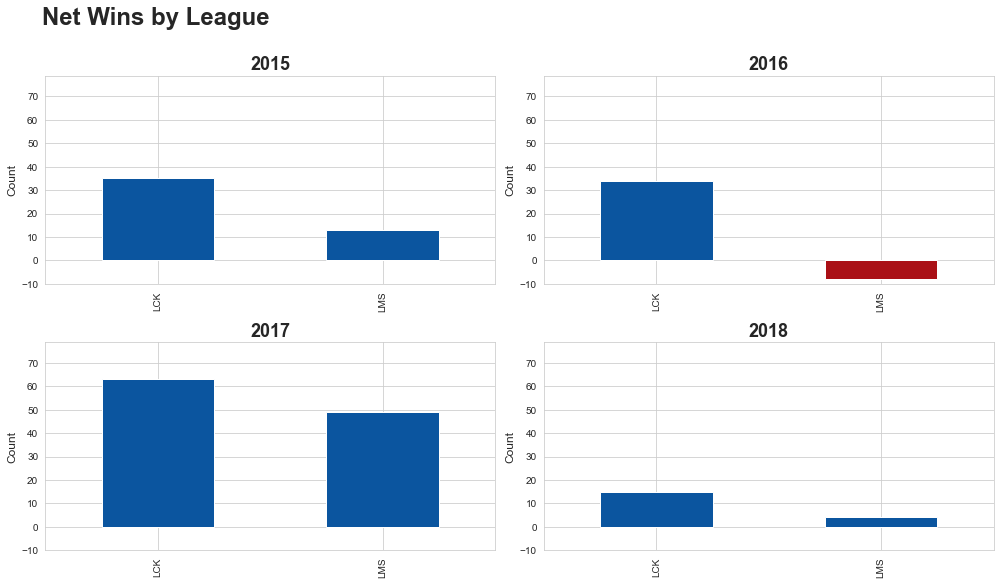

In [8]:
# Pivot by Year and League
pvt_net_wins_yl = df.pivot_table(index = ['Year', 'LA'], values = ['bResult', 'rResult'], aggfunc=np.sum)
pvt_net_wins_yl['b_net_wins'] = pvt_net_wins_yl['bResult'] - pvt_net_wins_yl['rResult']
pvt_net_wins_yl['positive'] = pvt_net_wins_yl['b_net_wins'] > 0

# Color Formatting
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

lst_years = pd.unique(pvt_net_wins_yl.index.get_level_values(0))
lst_x = [1, 2, 3, 4]

y_max = 1.25 * pvt_net_wins_yl['b_net_wins'].max()
y_min = 1.25 * pvt_net_wins_yl['b_net_wins'].min()

fig, ax = plt.subplots(2,2, figsize = (14,8))
fig.suptitle('Net Wins by League', x=0.045, y=1.01, fontsize=24, fontweight='bold', horizontalalignment='left')

for y, x in zip(lst_years, lst_x):
    # Filter pvt for year
    pvt_net_wins_yx = pvt_net_wins_yl[np.in1d(pvt_net_wins_yl.index.get_level_values(0), y)]
    pvt_net_wins_yx = pvt_net_wins_yx.reset_index(level=0, drop=True)
    
    p = plt.subplot(2,2,x)

    # Plot across Leagues
    pvt_net_wins_yx['b_net_wins'].plot(kind='bar', 
                                       color=pvt_net_wins_yx.positive.map({True:blues[5], 
                                                                           False:reds[5]}))
    
    # Format each plot
    plt.title(y, fontsize= 18, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
    plt.ylim(y_min, y_max)

plt.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()  

In [9]:
dct_seasons = {'Spring_Season':'SPRS', 'Summer_Season':'SUMS', 'Spring_Playoffs':'SPRP', 'Summer_Playoffs':'SUMP',
              'Regional':'REG', 'International':'INT', 'Winter_Season':'WNTRS', 'Winter_Playoffs':'WNTRP'}

# Map Seasons
df['SA'] = df['Season'].map(dct_seasons)
print(pd.unique(df['SA']))
df[['Season', 'SA']].head()

[nan]


,Season,SA
0,Spring,NaN
1,Spring,NaN
2,Spring,NaN
3,Spring,NaN
4,Spring,NaN


In [13]:
df_columns[8:16]


,ColumnName,ColumnDescription
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9,gamelength,Game length in minutes \n
10,golddiff,Gold difference - computed Blue minus Red - b...
11,goldblue,Blue Team's total gold value by minute \n
12,bKills,"List of Blue Team's kills - [Time in minutes,..."
13,bTowers,List of minutes that Blue Team destroyed a to...
14,bInhibs,List of minutes that Blue Team destroyed an i...
15,bDragons,List of minutes that Blue Team killed a drago...


In [14]:
df[['goldblue','bKills','bTowers', 'bInhibs', 'bDragons', 'bBarons']].head()

,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons
0,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[]
1,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]]
2,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]]
3,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...","[[8.274, 'TL Quas', 'TIP Rhux', ['TIP Apollo']...","[[19.941, 'BOT_LANE', 'OUTER_TURRET'], [38.77,...",[],[],[[37.513]]
4,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...","[[11.438, 'T8 Dodo8', 'CLG Doublelift', ['CLG ...","[[22.594, 'MID_LANE', 'OUTER_TURRET'], [34.213...","[[34.069, 'BOT_LANE']]","[[14.589, None], [30.307, None]]",[[32.556]]


In [15]:
# Use literal_eval to convert golddiff to list dat atype
from ast import literal_eval
df['golddiff'] = df['golddiff'].apply(literal_eval)

# Check to make sure function works correctly
print(type(df['golddiff'][0]))
print(df['golddiff'][0])

<class 'list'>
[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]


In [16]:
# Transform all other columns containing fake name lists to real lists
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

In [17]:
df['gamelength'][1234]

35

In [18]:
dct_win_team = dict(zip(df.index, df['win_team']))

In [19]:
df[['goldblue', 'goldred']].head()

,goldblue,goldred
0,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945..."
1,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893..."
2,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859..."
3,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...","[2415, 2415, 2720, 3822, 5170, 6479, 7963, 913..."
4,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...","[2375, 2375, 2666, 3986, 5291, 6508, 8008, 932..."


In [20]:
# Unstack df to dfu, reformatting data to have minutes along columns
df_gold = df[['goldblue', 'goldred']].unstack().apply(pd.Series)

# Map Level 1 to dct_win_team
df_gold['win_team'] = (df_gold.index.get_level_values(1))
df_gold['win_team'] = df_gold['win_team'].map(dct_win_team)
df_gold.head()

0       1       2       3       4       5       6       7  \
goldblue 0  2415.0  2415.0  2711.0  3887.0  5068.0  6171.0  7412.0  8661.0   
         1  2415.0  2415.0  2705.0  4108.0  5511.0  6797.0  7637.0  8953.0   
         2  2415.0  2415.0  2726.0  3794.0  4933.0  6236.0  8109.0  9656.0   
         3  2415.0  2415.0  2705.0  3847.0  5398.0  6473.0  7720.0  9308.0   
         4  2415.0  2415.0  2710.0  3950.0  5404.0  6666.0  7887.0  9131.0   

                  8        9  ...  86  87  88  89  90  91  92  93  94  \
goldblue 0  10154.0  11361.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         1  10183.0  11419.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         2  11073.0  12374.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         3  10547.0  12033.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         4  10646.0  11943.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

            win_team  
goldblue 0      blue  
         1       red  
         2      blue  
         3       red  
         4      blue  

[5 rows x 96 columns]

In [21]:
# Transform "variable" index to column
df_gold = df_gold.reset_index(level=0, drop=False)
df_gold = df_gold.rename(columns={'level_0':'variable'})
df_gold.head()

,variable,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,win_team
0,goldblue,2415.0,2415.0,2711.0,3887.0,5068.0,6171.0,7412.0,8661.0,10154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
1,goldblue,2415.0,2415.0,2705.0,4108.0,5511.0,6797.0,7637.0,8953.0,10183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
2,goldblue,2415.0,2415.0,2726.0,3794.0,4933.0,6236.0,8109.0,9656.0,11073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
3,goldblue,2415.0,2415.0,2705.0,3847.0,5398.0,6473.0,7720.0,9308.0,10547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
4,goldblue,2415.0,2415.0,2710.0,3950.0,5404.0,6666.0,7887.0,9131.0,10646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue


In [22]:
# Reformat dataframe to transform minute columns to a single column with the minute value within it through pd.melt
melt_gold = pd.melt(df_gold, ['variable', 'win_team'], var_name='minute')
print(melt_gold.shape)
melt_gold.head()

(1447800, 4)


,variable,win_team,minute,value
0,goldblue,blue,0,2415.0
1,goldblue,red,0,2415.0
2,goldblue,blue,0,2415.0
3,goldblue,red,0,2415.0
4,goldblue,blue,0,2415.0


In [23]:
melt_gold['var_color'] = np.where(melt_gold['variable']=='goldblue', 'blue', 'red')
melt_gold['win'] = 'no'
melt_gold.loc[((melt_gold['var_color']=='blue') & (melt_gold['win_team']=='blue')) |
             ((melt_gold['var_color']=='red') & (melt_gold['win_team']=='red')), 
              'win'] = 'yes'
melt_gold.head()

,variable,win_team,minute,value,var_color,win
0,goldblue,blue,0,2415.0,blue,yes
1,goldblue,red,0,2415.0,blue,no
2,goldblue,blue,0,2415.0,blue,yes
3,goldblue,red,0,2415.0,blue,no
4,goldblue,blue,0,2415.0,blue,yes


In [24]:
melt_gold.shape

(1447800, 6)

In [25]:
# Check that wins for blue 
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='blue')].head()

,variable,win_team,minute,value,var_color,win
7620,goldred,blue,0,2415.0,red,no
7622,goldred,blue,0,2415.0,red,no
7624,goldred,blue,0,2375.0,red,no
7626,goldred,blue,0,2415.0,red,no
7627,goldred,blue,0,2415.0,red,no


In [26]:
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='red')].head()

,variable,win_team,minute,value,var_color,win
1,goldblue,red,0,2415.0,blue,no
3,goldblue,red,0,2415.0,blue,no
5,goldblue,red,0,2415.0,blue,no
8,goldblue,red,0,2415.0,blue,no
13,goldblue,red,0,2415.0,blue,no


In [27]:
melt_gold.pivot_table(index=['win_team'], values=['win'], aggfunc='count', margins=True)

,win
win_team,
blue,787740
red,660060
All,1447800


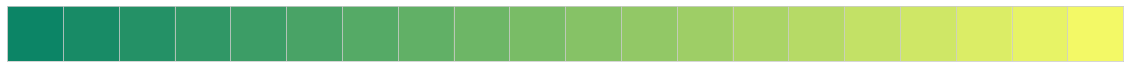

In [28]:
sns.palplot(sns.color_palette('summer', 20))
colors = sns.color_palette('summer', 20)

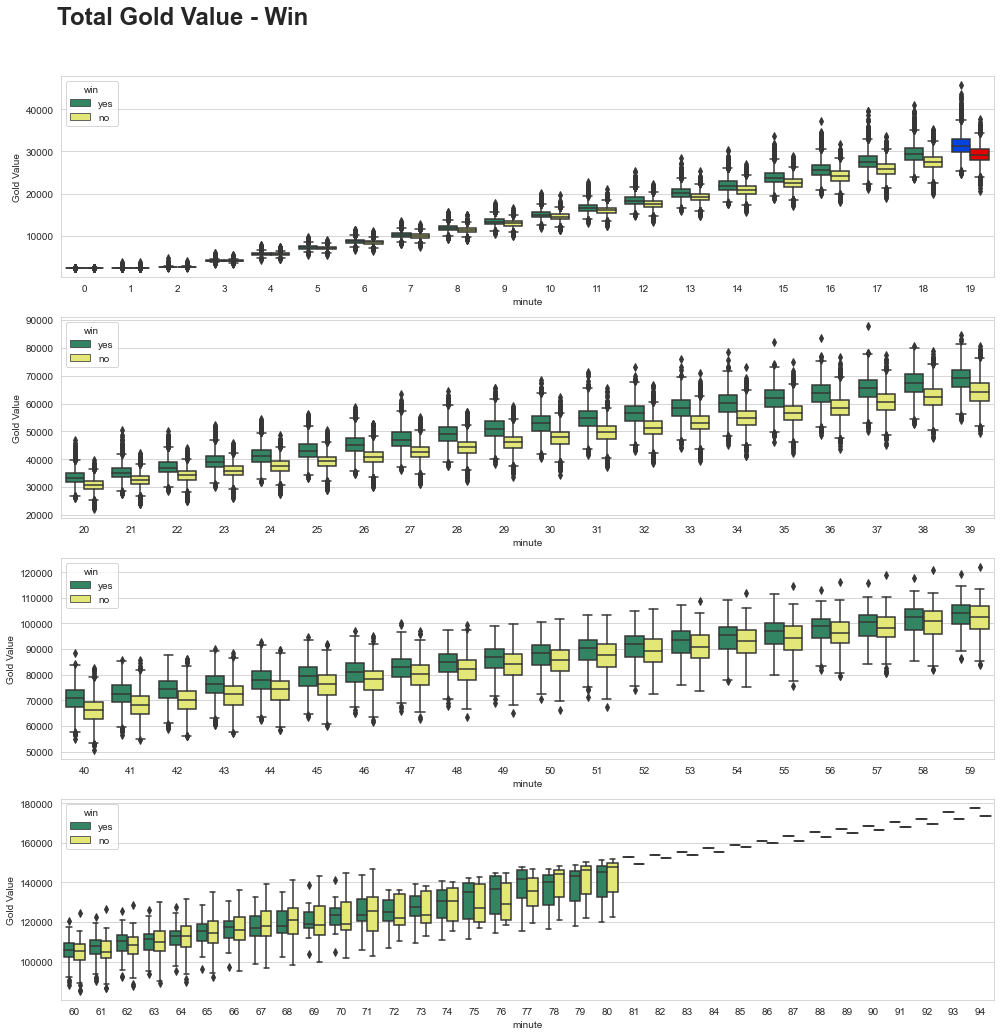

In [29]:
# Create pal dictionary using comprehension
pal = {win: colors[2] if win =='yes' else colors[19] for win in melt_gold.win.unique()}

fig, ax = plt.subplots(4,1, figsize=(14,14))
fig.suptitle('Total Gold Value - Win', fontsize=24, fontweight='bold', x=0.06, y=1.025, horizontalalignment='left')
fig.subplots_adjust(top=0.85)

plt.subplot(4,1,1)
p1 = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[melt_gold['minute']<20], 
                 palette=pal)
box = p1.artists[38] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['blue'])
box = p1.artists[39] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['red'])
plt.ylabel('Gold Value')

plt.subplot(4,1,2)
ax = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=20) & ((melt_gold['minute'] <40))],
                palette = pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,3)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=40) & ((melt_gold['minute']<60))], 
            palette=pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,4)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=60)], 
            palette=pal)
plt.ylabel('Gold Value')

plt.tight_layout()
plt.show()